In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
sys.path.append("data/")

import pandas as pd
import os
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import download
#download('stopwords')
import textblob
from datetime import datetime
import matplotlib.pyplot as plt
import datetime

In [181]:
# read dataset
china_daily = r"/home/mirandalv/Documents/Documents/github/Sentimental_Analysis/china_daily/data/inputData/raw_china_daily_columnist_data.csv"
data = pd.read_csv(china_daily, encoding='utf-8', sep=',')

# drop off duplicate record
data = data.drop_duplicates()

# set key words to filter the news
key_words1 = ['trade', 'trade war', 'Trade', "Trade war", "Trade War"]
key_words2 = ["trump", "Trump", "US president", "US President"]

data['trump'] = data['text'].apply(lambda x: "true" if any(word in x for word in key_words1) else "false")
data['trade'] = data['text'].apply(lambda x: "true" if any(word in x for word in key_words2) else "false")

# select news related to trade war between US and China
subdata = data[((data['trump'] == "true") & (data["trade"] == "true"))]

# data clean
# remove all new line "\n"
subdata = subdata.replace('\n', '', regex=True)

# extract date and news source from the date_publushed column
subdata['date'] = subdata['date_published'].apply(lambda x: x.split('|')[-1])
subdata["date"] = subdata["date"].apply(lambda x: x.strip().split(" ")[1])

subdata['news_source'] = subdata['date_published'].apply(lambda x: x.split('|')[-2].strip())

#subdata = subdata['date'].loc['2016-10-31':'2019-02-01']


In [182]:
subdata

,title,date_published,text,trump,trade,date,news_source
7,The future holds promise thanks to painstaking...,By Fu Jing | China Dai...,With Greece officially end...,true,true,2018-09-11,China Daily
13,Not the right time for EU to fall for US trade...,By Fu Jing | China Dai...,The surprising announcemen...,true,true,2018-08-14,China Daily
15,Spark the G20 spirit to stop US destroying WTO,By Fu Jing | China Dai...,The World Trade Organiz...,true,true,2018-07-17,China Daily
17,It's time the EU realized US' anti-free trade ...,By Fu Jing | China Dai...,US President Donald Tru...,true,true,2018-07-10,China Daily
19,Nation looks to capitalize on year of vital an...,By Fu Jing | China Dai...,The first six months of th...,true,true,2018-07-03,China Daily
21,"China, EU can work together to help others",By Fu Jing | China Dai...,[Photo/VCG] With US Pr...,true,true,2018-06-26,China Daily
23,"EU should judge the US by its actions, not rep...",By Fu Jing | China Dai...,[Photo/VCG] Beijing an...,true,true,2018-06-20,China Daily
27,Partnership between EU and US is no longer rosy,By Fu Jing | China Dai...,Is the United States still...,true,true,2018-06-05,China Daily
31,EU needs more partners to safeguard globalization,By Fu Jing | China Dai...,"Given the uncertainties, c...",true,true,2018-05-23,China Daily
35,Media games won't hurt Belt and Road planned p...,By Fu Jing | China Dai...,The China-proposed Belt...,true,true,2018-04-24,China Daily


In [183]:
subdata = subdata.reset_index(drop=True)

In [184]:
subdata.to_csv("trump_trade.csv", encoding='utf-8', sep=',', index=False)

In [2]:
subdata = pd.read_csv('trump_trade1.csv', encoding='utf-8', sep=',')

In [127]:
#for i in range(0, len(subdata)):
    
news_content = re.sub('[^a-zA-Z0-9 ]', '', subdata["text"][0]).strip()

In [156]:
text_blob = textblob.TextBlob(subdata["text"][0].strip())

In [3]:
sentiment_mean = list()

for i in range(0, len(subdata)):
    
    text_blob = textblob.TextBlob(subdata["text"][i].strip())
    sent_len = len(text_blob.sentences)
    
    sentiment_score = 0
    
    for j in range(0, sent_len):
        
        sentiment_score += float(text_blob.sentences[j].sentiment.polarity)
    
    mean_score = sentiment_score/sent_len
    
    sentiment_mean.append(mean_score)
        

In [4]:
subdata['sentiment_mean'] = sentiment_mean

In [5]:

date = subdata.sort_values(by=['date'])['date'].tolist()
sentiment_mean_score = subdata.sort_values(by=['date'])['sentiment_mean'].tolist()

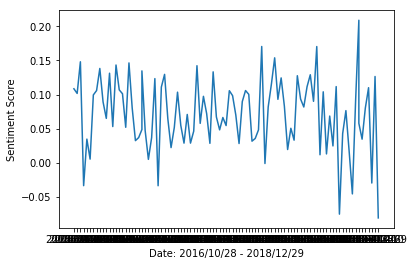

In [11]:
plt.plot(date, sentiment_mean_score)
year_2017 = '2017-01-01'
year_2018 = '2018-01-01'

plt.xlabel('Date: 2016/10/28 - 2018/12/29')
plt.ylabel('Sentiment Score')
plt.show()

In [191]:
datetime.date(2010, 12, 31).strftime("%V")

str

In [8]:
date

[u'2016-10-29',
 u'2016-11-25',
 u'2016-12-09',
 u'2016-12-24',
 u'2017-01-13',
 u'2017-01-20',
 u'2017-02-03',
 u'2017-03-17',
 u'2017-04-07',
 u'2017-04-18',
 u'2017-04-21',
 u'2017-04-26',
 u'2017-05-23',
 u'2017-06-01',
 u'2017-06-06',
 u'2017-06-27',
 u'2017-07-01',
 u'2017-07-04',
 u'2017-07-18',
 u'2017-07-21',
 u'2017-07-22',
 u'2017-07-28',
 u'2017-07-28',
 u'2017-08-17',
 u'2017-08-25',
 u'2017-08-31',
 u'2017-09-05',
 u'2017-09-08',
 u'2017-09-15',
 u'2017-09-29',
 u'2017-10-13',
 u'2017-11-02',
 u'2017-11-09',
 u'2017-11-10',
 u'2017-11-14',
 u'2017-11-30',
 u'2017-12-12',
 u'2017-12-19',
 u'2017-12-21',
 u'2018-01-05',
 u'2018-01-12',
 u'2018-01-24',
 u'2018-01-26',
 u'2018-01-31',
 u'2018-02-09',
 u'2018-02-14',
 u'2018-02-23',
 u'2018-03-07',
 u'2018-03-10',
 u'2018-03-13',
 u'2018-03-14',
 u'2018-03-15',
 u'2018-03-23',
 u'2018-03-27',
 u'2018-03-30',
 u'2018-04-05',
 u'2018-04-10',
 u'2018-04-12',
 u'2018-04-14',
 u'2018-04-18',
 u'2018-04-20',
 u'2018-04-24',
 u'2018-